In [47]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import scipy.constants as const
import tqdm
import pandas as pd
import matplotlib.colors
import matplotlib.patches as patches
import pickle

%matplotlib widget

In [48]:
wires = []

#wires.append([(0,0,i) for i in np.linspace(-1,1,100)]) # straight line wire
#wire.append([(0,0,10), (0,0,0), (0,10,0)]) # bent wire
wires.append([(math.cos(i), math.sin(i), 0) for i in np.linspace(0, 2*math.pi, 33)]) # circular wire
wires = np.array(wires)

In [49]:
wires = []
length = 1
res = 0.1 # resolution of wire
radius = 0.1

wires_per_side = 100
num_sides = 2

thetas = np.array([math.asin(i/(wires_per_side+1)) for i in range(1,wires_per_side)])
thetas *= 2/num_sides


for i in range(num_sides):
    angle_offset = i*math.pi*2/num_sides
    for theta in thetas:
        a = radius
        wires.append([(a*math.cos(angle_offset+theta), a*math.sin(angle_offset+theta), i) for i in np.arange(-length, length, res)]) # positive z
        wires.append([(a*math.cos(angle_offset-theta), a*math.sin(angle_offset-theta), -i) for i in np.arange(-length, length, res)]) # negative z

wires = np.array(wires)

In [58]:
np.random.seed(0)
pos_offset = np.zeros((4,3))
#pos_offset = np.random.rand(4,3)*0.002 - 0.001
pos_offset[0] = np.array([-0.0001,0.0,0.0])
pos_offset

array([[-0.0001,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ]])

In [59]:
# WIRE DEFINITION
wires = []
colors = []

res = 65 # number of points per loop
# use number like 1+2^n for best results

# SRF SOLENOIDS
r1 = 0.0366; r2 = 0.0469; z1 = 0.0140; z2=0.0359; Nt = 66; layers = 36
for a in np.linspace(r1,r2,layers): # TOP SOLENOID
    for h in np.linspace(z1,z2,Nt):
        #print('no top solenoid')
        wires.append([(a*math.cos(i)+pos_offset[0,0], a*math.sin(i)+pos_offset[0,1], h+pos_offset[0,2]) for i in np.linspace(0, 2*math.pi, res, endpoint=True)])
        colors.append([0] * res)
for a in np.linspace(r1,r2,layers): # BOTTOM SOLENOID
    for h in np.linspace(-z1,-z2,Nt):
        #print('no bottom solenoid')
        wires.append([(a*math.cos(i)+pos_offset[1,0], a*math.sin(i)+pos_offset[1,1], h+pos_offset[1,2]) for i in np.linspace(0, 2*math.pi, res, endpoint=True)])
        colors.append([1] * res)

# SRF SHIELD1
r1 = 0.0505; r2 = 0.0591; z1 = 0.0404; z2 = 0.0511; Nt=32; layers=30
for a in np.linspace(r1,r2,layers): # TOP SHIELD1
    for h in np.linspace(z1,z2,Nt):
        #print('no top shield1')
        wires.append([(a*math.cos(i)+pos_offset[0,0], -a*math.sin(i)+pos_offset[0,1], h+pos_offset[0,2]) for i in np.linspace(0, 2*math.pi, res, endpoint=True)])
        colors.append([2] * res)
for a in np.linspace(r1,r2,layers): # BOTTOM SHIELD1
    for h in np.linspace(-z1,-z2,Nt):
        #print('no bottom shield1')
        wires.append([(a*math.cos(i)+pos_offset[1,0], -a*math.sin(i)+pos_offset[1,1], h+pos_offset[1,2]) for i in np.linspace(0, 2*math.pi, res, endpoint=True)])
        colors.append([3] * res)

# SRF SHIELD2
r1=0.065; r2=0.0679; z1=0.0359; z2=0.0417; Nt=17; layers=10
for a in np.linspace(r1,r2,layers): # TOP SHIELD2
    for h in np.linspace(z1,z2,Nt):
        #print('no top shield2')
        wires.append([(a*math.cos(i)+pos_offset[2,0] , -a*math.sin(i)+pos_offset[2,1], h+pos_offset[2,0]) for i in np.linspace(0, 2*math.pi, res, endpoint=True)])
        colors.append([4] * res)
for a in np.linspace(r1,r2,layers): # BOTTOM SHIELD2
    for h in np.linspace(-z1,-z2,Nt):
        #print('no bottom shield2')
        wires.append([(a*math.cos(i)+pos_offset[3,0], -a*math.sin(i)+pos_offset[3,1], h+pos_offset[3,2]) for i in np.linspace(0, 2*math.pi, res, endpoint=True)])
        colors.append([5] * res)

currents = [5.5] # amount of current in wire (A)

wires = np.array(wires)
colors = np.array(colors).flatten()

In [60]:
# add/normalize density of wire points 
#updated_wires = []
#for wire_points in wires:
#    new_wire_points = []
#    for i in range(len(wire_points)-1):
#        p1 = wire_points[i]
#        p2 = wire_points[i+1]
#        new_wire_points.append(p1)

#        dist = math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)
#        num_points = int(dist*resolution*4/bounding_box)
#        for j in range(num_points):
#            new_wire_points.append((p1[0]+(p2[0]-p1[0])*j/num_points, p1[1]+(p2[1]-p1[1])*j/num_points, p1[2]+(p2[2]-p1[2])*j/num_points))
#        new_wire_points.append(p2)

#        # check for duplicates
#        new_wire_points = list(dict.fromkeys(new_wire_points))
#    updated_wires.append(np.array(new_wire_points))

#wires = np.array(updated_wires)
#print("Number of points added:", np.sum([len(updated_wires[i])-len(wires[i]) for i in range(len(wires))]))

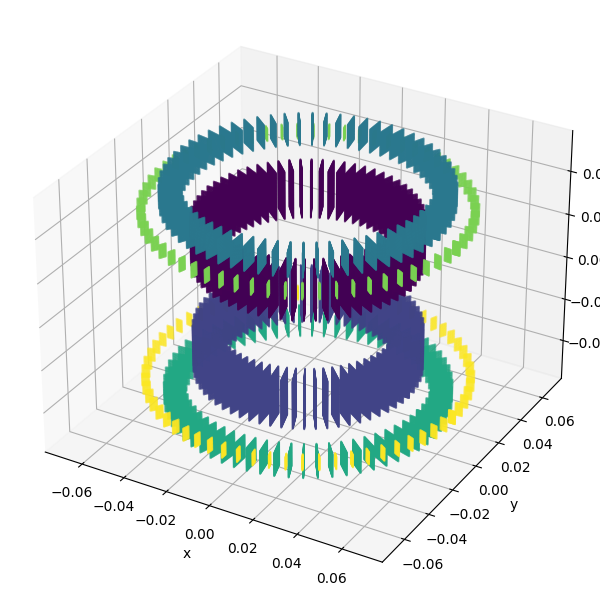

In [61]:
# display wire geometry
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0, 0, 1, 1], projection='3d', auto_add_to_figure=False)

ax.scatter(wires[:,:,0], wires[:,:,1], wires[:,:,2], c=colors, s=0.1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#print("Number of wire points: " + str(sum([len(wire) for wire in wires])))

In [62]:
wires[:,:,2].sum()

-1.4210854715202004e-13

In [63]:
# pre-process wire geometry into segments
segment_vectors = []
segment_positions = []
for wire in wires:
    segment_vectors.append(np.array([wire[i+1]-wire[i] for i in range(len(wire)-1)]))
    segment_positions.append(np.array([wire[i] for i in range(len(wire)-1)]))

# scale magnitude of vectors by current if specified
#if len(currents) == len(wires):
#    for i in range(len(segment_vectors)):
#        segment_vectors[i] *= currents[i]
#else:
#    segment_vectors *= currents[0]

# merge wires into single array
segment_vectors = np.concatenate(segment_vectors)
segment_positions = np.concatenate(segment_positions)

wire_segments = np.array([[segment_positions[i], segment_vectors[i]] for i in range(len(segment_vectors))])

In [64]:
# pickle wire segments
with open('wire_segments.pkl', 'wb') as f:
    pickle.dump(wire_segments, f)

Total Vector Sum:[-3.63944985e-15 -3.06941972e-14  0.00000000e+00]
Average Position:[-2.18825768e-18 -3.92528500e-19  9.99587398e-18]


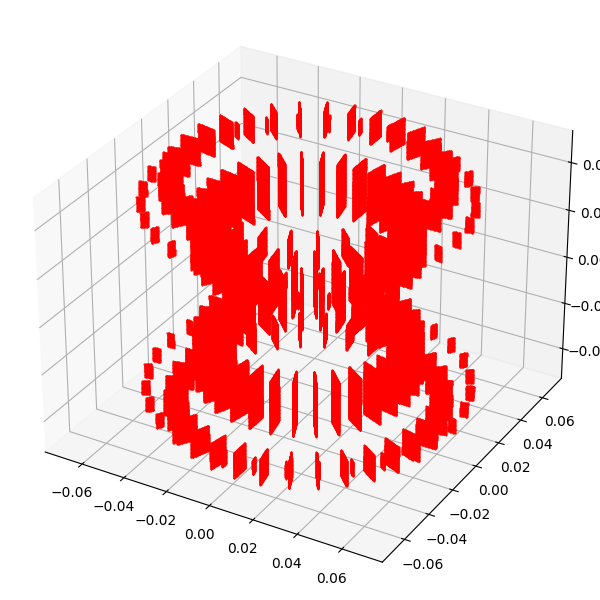

In [57]:
# plot wire positions
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0, 0, 1, 1], projection='3d', auto_add_to_figure=False)

#ax.quiver([wire_segments[i,0,0] for i in range(wire_segments.shape[0])],
#          [wire_segments[i,0,1] for i in range(wire_segments.shape[0])],
#          [wire_segments[i,0,2] for i in range(wire_segments.shape[0])],
#          [wire_segments[i,1,0] for i in range(wire_segments.shape[0])],
#          [wire_segments[i,1,1] for i in range(wire_segments.shape[0])],
#          [wire_segments[i,1,2] for i in range(wire_segments.shape[0])],
#          length=0.5, normalize=False)

ax.plot([wire_segments[i,0,0] for i in range(wire_segments.shape[0])],
        [wire_segments[i,0,1] for i in range(wire_segments.shape[0])],
        [wire_segments[i,0,2] for i in range(wire_segments.shape[0])],
        'ro', markersize=0.5)

print('Total Vector Sum:' + str(np.sum(wire_segments[:,1], axis=0)))
print('Average Position:' + str(np.average(wire_segments[:,0], axis=0)))